<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/IntroToMLandNN_12June2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1IHNpVtHDDXcZfhOedunQJKv5N5gfkMnp?usp=sharing

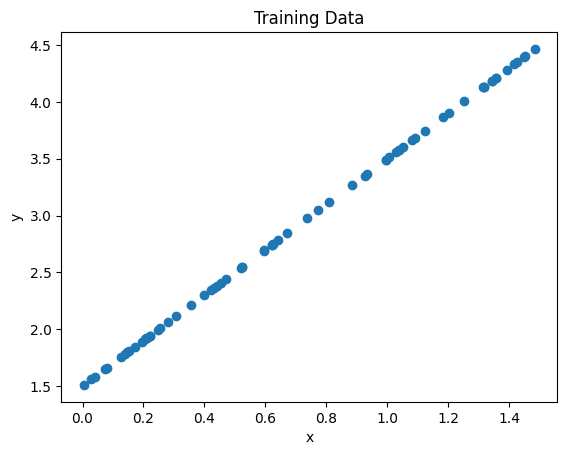

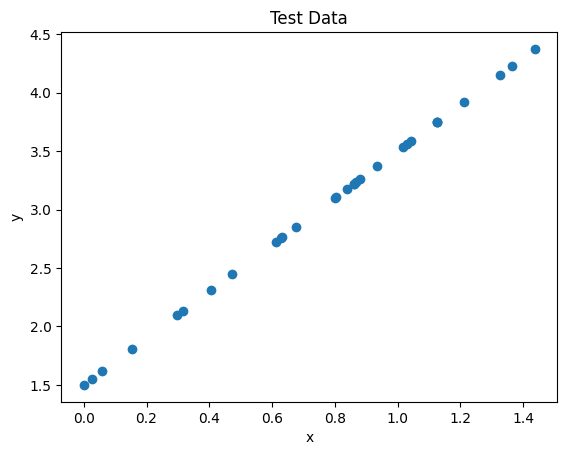

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# lets first generate a dataset of N points this time
np.random.seed(1)
N = 100
X = np.random.rand(N,1)*1.5 # 0 to 1.5 is the range
# y = 0.7*(X**5) - \
#     2.1*(X**4) + \
#     2.3*(X**3) + \
#     0.2*(X**2) + \
#     0.3* X + \
#     0.4*np.random.rand(N,1)

#y = 1.5*(X**0) + 2.0*(X**1) + 0.7*(X**2)
y = 1.5*(X**0) + 2.0*(X**1) # y = 1.5 + 2x

from sklearn.model_selection import train_test_split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 30% test set

# plot train data
fig = plt.figure()
plt.scatter(X_train_orig, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

# plot test data
fig = plt.figure()
plt.scatter(X_test_orig, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data")
plt.show()


In [ ]:
print(X_train_orig.shape,X_test_orig.shape)
print(np.mean(X_train_orig),np.std(X_train_orig))
print(np.mean(X_test_orig),np.std(X_test_orig))
print(y_train.shape,y_test.shape)

(70, 1) (30, 1)
0.7135843233745067 0.4589255170001547
0.7643595501268793 0.3959898044646357
(70, 1) (30, 1)


In [ ]:
# preprocessing the data
# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train_orig)
X_train = scaler.transform(X_train_orig)
X_test = scaler.transform(X_test_orig)
print(np.mean(X_train),np.std(X_train))
print(np.mean(X_test),np.std(X_test))

6.661338147750939e-17 0.9999999999999998
0.11063936275383697 0.8628629043185284


In [ ]:
# adding bias column (for w0) to X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_train.shape)
print(X_test.shape)
print(X_train[0,:])

(70, 2)
(30, 2)
[1.         0.12801499]


In [ ]:
# function to compute hypothesis / predictions
def predict(X, weight):
    return np.dot(X, weight)

# function to compute gradient of error function w.r.t. weight without regularization
def gradient_woRegul(X, y, weight):
    y_pred = predict(X, weight)
    grad = 2*np.dot(X.transpose(), (y_pred - y))
    return grad

# function to compute gradient of error function w.r.t. weight with L1 Regularization
def gradient_wL1Regul(X, y, weight,L1):
    y_pred = predict(X, weight)
    grad = 2*np.dot(X.transpose(), (y_pred - y)) + L1*np.sign(weight)
    return grad

# function to compute gradient of error function w.r.t. weight with L2 Regularization
def gradient_wL2Regul(X, y, weight,L2):
    y_pred = predict(X, weight)
    grad = 2*np.dot(X.transpose(), (y_pred - y)) + 2*L2*weight
    return grad

# function to compute gradient of error function w.r.t. weight with L1 and L2 Regularization
def gradient_wL1andL2Regul(X, y, weight, L1=0, L2=0):
    y_pred = predict(X, weight)
    grad = 2*np.dot(X.transpose(), (y_pred - y)) + L1*np.sign(weight) + 2*L2*weight
    return grad

# function to compute the error (cost) for current values of weight
def MSE_error(X, y, weight):
    y_pred = predict(X, weight)
    e = np.mean((y-y_pred)**2)
    return e

# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size = 32):

    mini_batches = []
    data = np.hstack((X, y))

    np.random.shuffle(data)
    if data.shape[0]%batch_size == 0:
      minibatch_count = data.shape[0] // batch_size
    else:
      minibatch_count = data.shape[0] // batch_size + 1

    for i in range(minibatch_count):
        #
        mini_batch = data[i * batch_size: (i + 1)*batch_size, :]
        X_minibatch = mini_batch[:, :-1]
        Y_minibatch = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_minibatch, Y_minibatch))

    return mini_batches

In [ ]:
# function to perform BGD / MBGD / SGD
def gradientDescent(X, y, learning_rate = 1e-4, batch_size = 32, max_epochs=3, L1=0, L2=0):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    #max_iters = 3 # number of epochs
    #w0_list = []
    #w1_list = []
    #grad0_list = []
    #grad1_list = []
    weight_list = []
    grad_list = []

    for itr in range(max_epochs):
        # creates mini-batch
        mini_batches = create_mini_batches(X, y, batch_size)
        #learn_rate = 1/(itr+1)*learning_rate

        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            grad = gradient_wL1andL2Regul(X_mini, y_mini, weight,L1=L1,L2=L2)
            #grad0_list.append(grad[0])
            #grad1_list.append(grad[1])
            grad_list.append(grad)
            weight = weight - learning_rate * grad # weight update
            #w0_list.append(weight[0])
            #w1_list.append(weight[1])
            weight_list.append(weight)
            error = MSE_error(X_mini, y_mini, weight)
            error_list.append(error)

    return weight, weight_list, error_list, grad_list



weights =  [[2.92462823]
 [0.91705445]]
[7.934592614336595e-06, 7.71397920128775e-06, 7.499499723575286e-06, 7.290983633260976e-06, 7.088265124322289e-06]

[9.149109846820558, 8.89472799663956, 8.647418979420998, 8.406986142117173, 8.173238299421747]
[-409.80361054486195, -404.0663599972338, -398.4094309572726, -392.8316989238707, -387.3320551389365]
[0.0409803610544862, 0.08138699705420958, 0.12122794014993685, 0.16051111004232393, 0.19924431555621758]
[-128.49914476004332, -126.70015673340272, -124.92635453913509, -123.17738557558721, -121.45290217752898]
[0.012849914476004334, 0.025519930149344606, 0.038012565603258115, 0.05033030416081684, 0.06247559437856974]


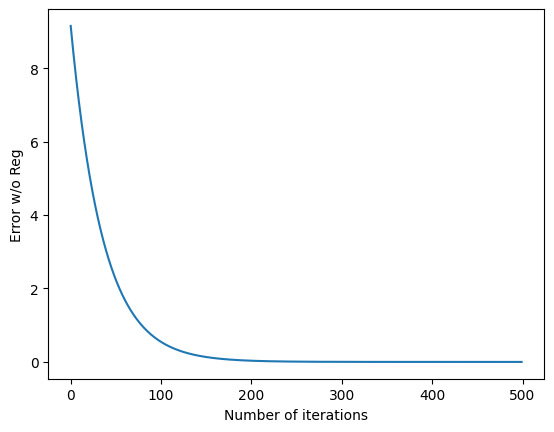

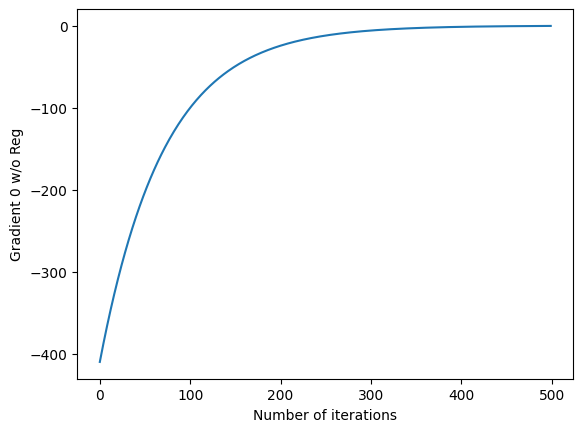

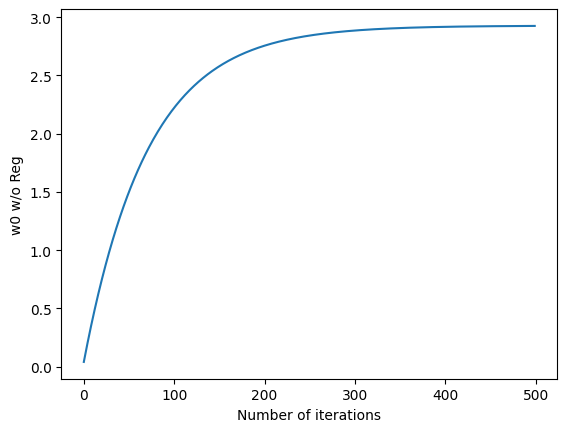

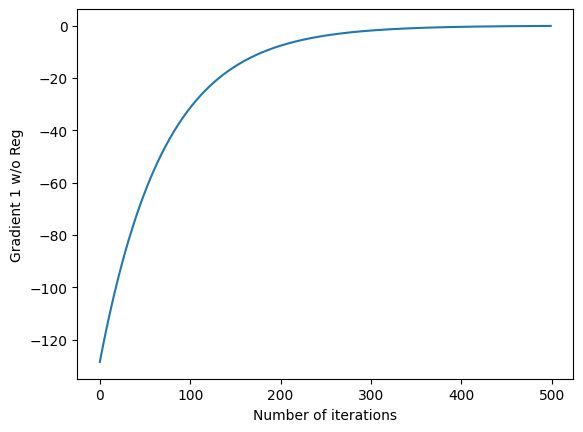

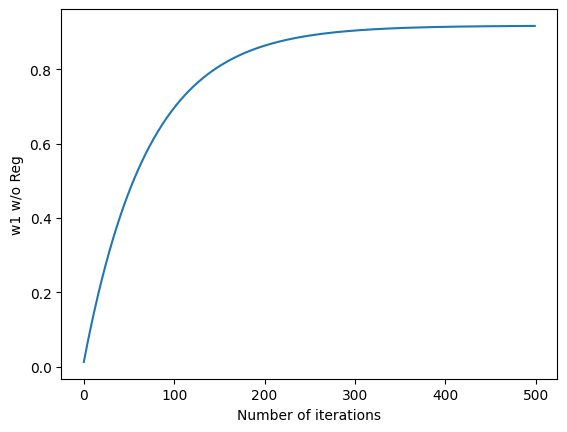

In [ ]:
lr = 1e-4
BSize = X_train.shape[0]
N_epochs = 500
weight, weight_list, error_list, grad_list = gradientDescent(X_train, y_train, learning_rate = lr, batch_size = BSize, max_epochs=N_epochs)
N = len(error_list)
print("weights = ", weight)
print(error_list[-5:])
print()

grad0_list, grad1_list = [grad[0][0] for grad in grad_list], [grad[1][0] for grad in grad_list]
w0_list, w1_list = [wt[0][0] for wt in weight_list], [wt[1][0] for wt in weight_list]

#print(X_train[:])
print(error_list[:5])
print(grad0_list[:5])
print(w0_list[:5])
print(grad1_list[:5])
print(w1_list[:5])


# visualising error
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Error w/o Reg")
plt.show()

# visualising gradient 0
plt.plot(grad0_list)
plt.xlabel("Number of iterations")
plt.ylabel("Gradient 0 w/o Reg")
plt.show()

# visualising w0
plt.plot(w0_list)
plt.xlabel("Number of iterations")
plt.ylabel("w0 w/o Reg")
plt.show()


# visualising gradient 1
plt.plot(grad1_list)
plt.xlabel("Number of iterations")
plt.ylabel("Gradient 1 w/o Reg")
plt.show()

# visualising w1
plt.plot(w1_list)
plt.xlabel("Number of iterations")
plt.ylabel("w1 w/o Reg")
plt.show()

In [ ]:
# increasing the degrees and then adding StandardScaler
#scaler = StandardScaler()
X_train = np.hstack((X_train_orig,X_train_orig**2,X_train_orig**3))
X_test = np.hstack((X_test_orig,X_test_orig**2,X_test_orig**3))
print(np.mean(X_train,axis=0),np.std(X_train,axis=0))
print(np.mean(X_test,axis=0),np.std(X_test,axis=0))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("train data ",np.mean(X_train,axis=0),np.std(X_train,axis=0))
print("test data",np.mean(X_test,axis=0),np.std(X_test,axis=0))

[0.71358432 0.71981522 0.82870361] [0.45892552 0.70666333 1.00310018]
[0.76435955 0.74105345 0.78268345] [0.3959898  0.57090037 0.78813383]
train data  [ 3.01346250e-16 -7.61295788e-17 -2.85485921e-17] [1. 1. 1.]
test data [ 0.11063936  0.03005424 -0.04587793] [0.8628629  0.80788169 0.78569802]


In [ ]:
# adding bias column (for w0) to X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_train.shape)
print(X_test.shape)

(70, 4)
(30, 4)


weights =  [[2.92462823]
 [0.51586689]
 [0.27640624]
 [0.11892572]]
[0.012794405033485546, 0.01276738272403652, 0.012740422626773605, 0.012713524466850076, 0.01268668797398915]



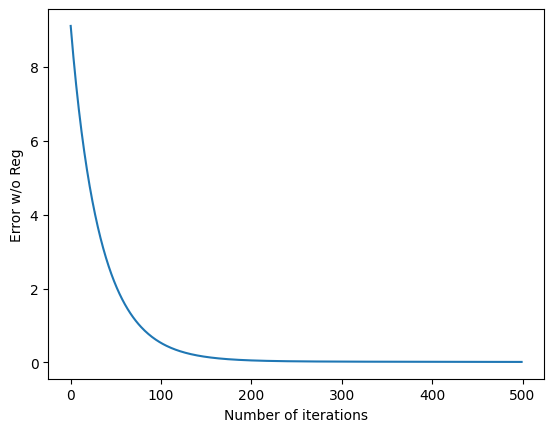

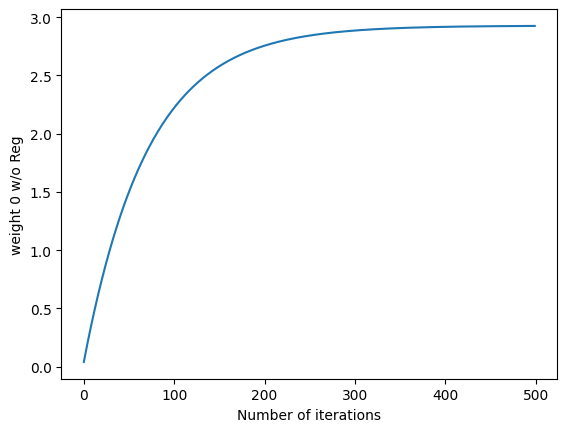

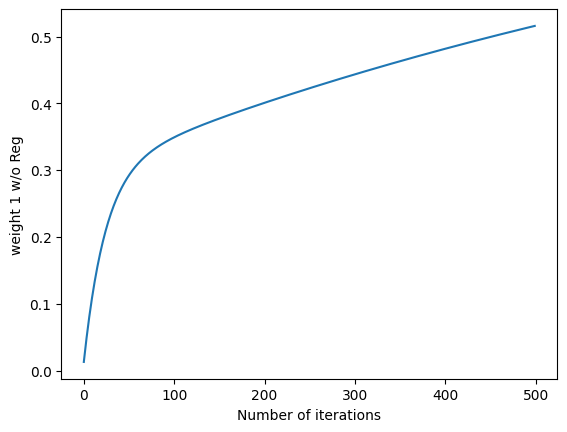

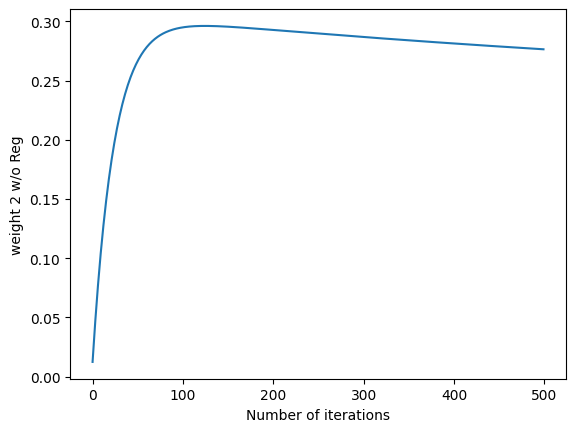

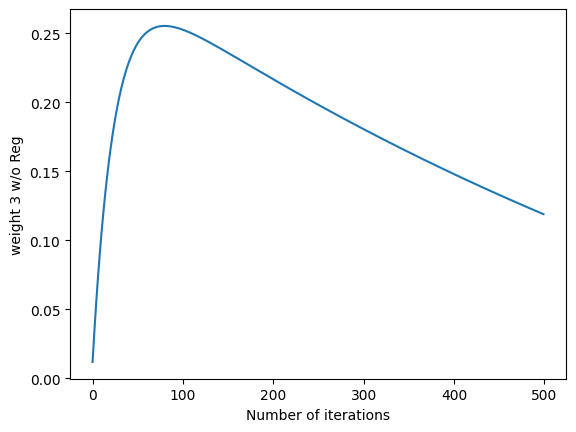

In [ ]:
lr = 1e-4
BSize = X_train.shape[0]
N_epochs = 500
weight, weight_list, error_list, grad_list = gradientDescent(X_train, y_train, learning_rate = lr, batch_size = BSize, max_epochs=N_epochs)
N = len(error_list)
print("weights = ", weight)
print(error_list[-5:])
print()

grad0_list, grad1_list, grad2_list, grad3_list  = [grad[0][0] for grad in grad_list], [grad[1][0] for grad in grad_list], [grad[2][0] for grad in grad_list], [grad[3][0] for grad in grad_list]
w0_list, w1_list, w2_list, w3_list = [wt[0][0] for wt in weight_list], [wt[1][0] for wt in weight_list], [wt[2][0] for wt in weight_list], [wt[3][0] for wt in weight_list]


# visualising error
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Error w/o Reg")
plt.show()

# visualising weight 0
plt.plot(w0_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 0 w/o Reg")
plt.show()

# visualising weight 1
plt.plot(w1_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 1 w/o Reg")
plt.show()


# visualising weight 2
plt.plot(w2_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 2 w/o Reg")
plt.show()

# visualising weight 3
plt.plot(w3_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 3 w/o Reg")
plt.show()

weights =  [[2.21097123]
 [0.17808486]
 [0.0074867 ]
 [0.01747671]]
[1.0493005561221094, 1.0496634356701242, 1.0232972370832758, 1.0247358704131457, 1.026114982528351]



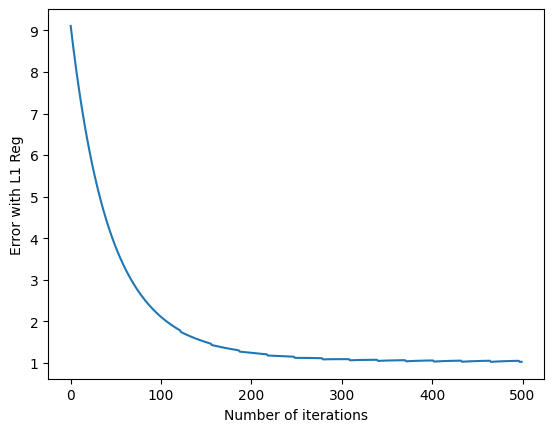

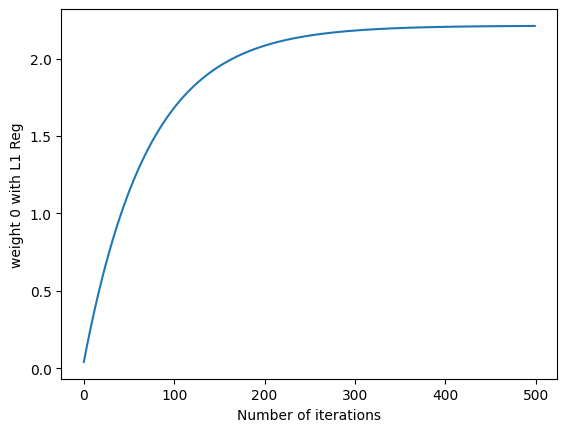

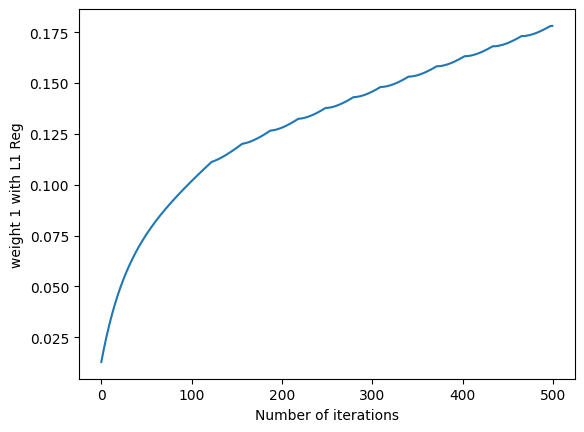

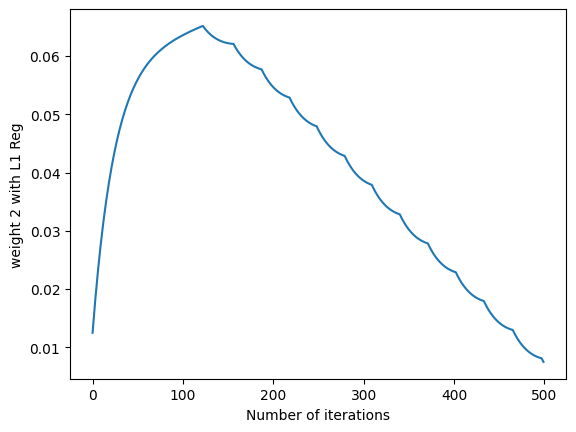

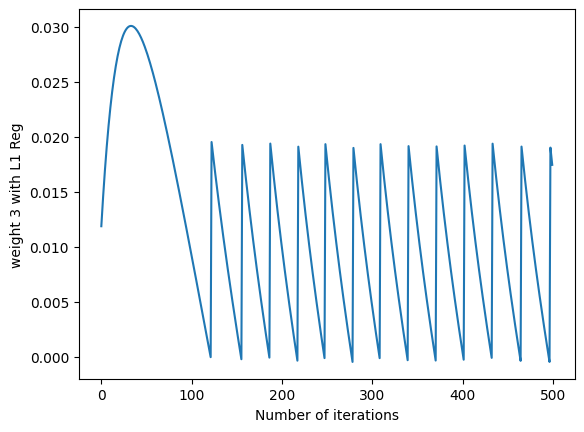

In [ ]:
lr = 1e-4
BSize = X_train.shape[0]
N_epochs = 500
L1 = 100.0
weight, weight_list, error_list, grad_list = gradientDescent(X_train, y_train, learning_rate = lr, batch_size = BSize, max_epochs=N_epochs, L1=L1)
N = len(error_list)
print("weights = ", weight)
print(error_list[-5:])
print()

grad0_list, grad1_list, grad2_list, grad3_list  = [grad[0][0] for grad in grad_list], [grad[1][0] for grad in grad_list], [grad[2][0] for grad in grad_list], [grad[3][0] for grad in grad_list]
w0_list, w1_list, w2_list, w3_list = [wt[0][0] for wt in weight_list], [wt[1][0] for wt in weight_list], [wt[2][0] for wt in weight_list], [wt[3][0] for wt in weight_list]


# visualising error
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Error with L1 Reg")
plt.show()

# visualising weight 0
plt.plot(w0_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 0 with L1 Reg")
plt.show()

# visualising weight 1
plt.plot(w1_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 1 with L1 Reg")
plt.show()


# visualising weight 2
plt.plot(w2_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 2 with L1 Reg")
plt.show()

# visualising weight 3
plt.plot(w3_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 3 with L1 Reg")
plt.show()

weights =  [[1.2053047 ]
 [0.22812031]
 [0.20246453]
 [0.18056558]]
[3.084453126460082, 3.0844531195737934, 3.084453112897117, 3.0844531064234424, 3.084453100146374]



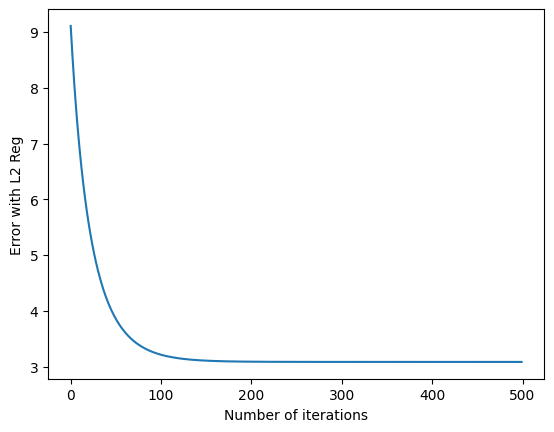

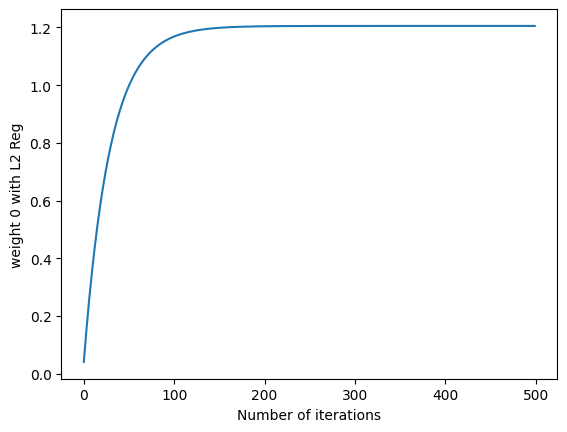

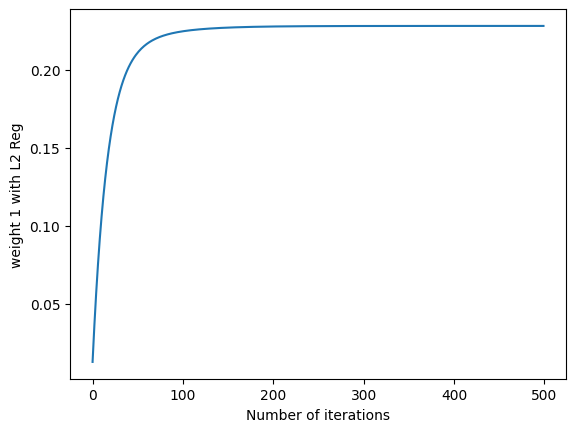

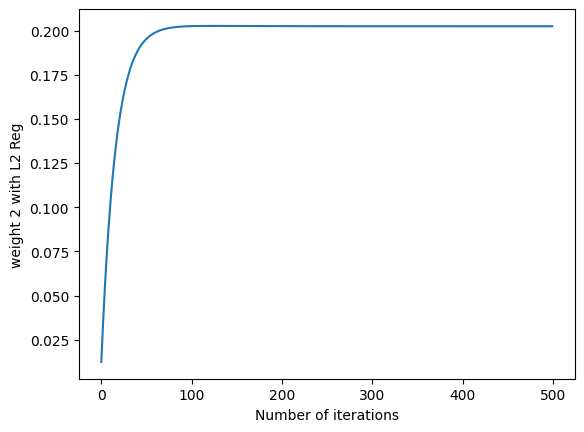

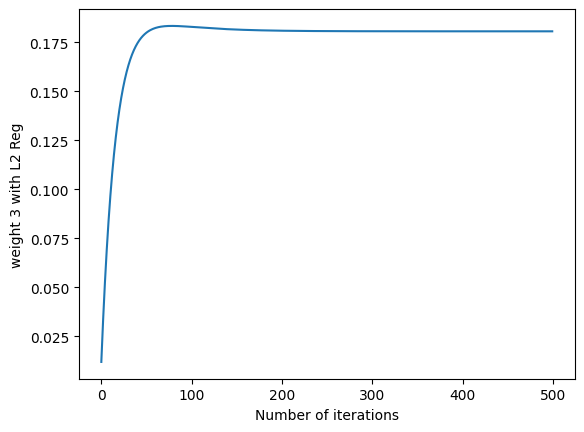

In [ ]:
lr = 1e-4
BSize = X_train.shape[0]
N_epochs = 500
L2 = 100.0
weight, weight_list, error_list, grad_list = gradientDescent(X_train, y_train, learning_rate = lr, batch_size = BSize, max_epochs=N_epochs, L2=L2)
N = len(error_list)
print("weights = ", weight)
print(error_list[-5:])
print()

grad0_list, grad1_list, grad2_list, grad3_list  = [grad[0][0] for grad in grad_list], [grad[1][0] for grad in grad_list], [grad[2][0] for grad in grad_list], [grad[3][0] for grad in grad_list]
w0_list, w1_list, w2_list, w3_list = [wt[0][0] for wt in weight_list], [wt[1][0] for wt in weight_list], [wt[2][0] for wt in weight_list], [wt[3][0] for wt in weight_list]


# visualising error
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Error with L2 Reg")
plt.show()

# visualising weight 0
plt.plot(w0_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 0 with L2 Reg")
plt.show()

# visualising weight 1
plt.plot(w1_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 1 with L2 Reg")
plt.show()


# visualising weight 2
plt.plot(w2_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 2 with L2 Reg")
plt.show()

# visualising weight 3
plt.plot(w3_list)
plt.xlabel("Number of iterations")
plt.ylabel("weight 3 with L2 Reg")
plt.show()